In [1]:
import pandas as pd 
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
os.chdir('C:\\Users\\mohda\\Documents\\kffnf_jugnu_private')


In [2]:
df=pd.read_spss("data/data_hies/sec 6a.sav")

In [3]:
df2=pd.read_spss('data/data_hies/plist.sav')

In [4]:
print(df['itc'].unique)

<bound method Series.unique of 0                                                     1000.0
1                                                     1001.0
2                                                     1002.0
3                                                     1003.0
4                                                     1004.0
                                 ...                        
2246535                                Toilet Soap , Shampoo
2246536               Tooth Paste, Tooth Brush, Tooth Powder
2246537    Shaving Brush, Blade, Razors, Shaving Cream /G...
2246538    Imitation and plastic Jewellery & ornaments (b...
2246539    Other  miscellaneous expenditure ( pocket mone...
Name: itc, Length: 2246540, dtype: category
Categories (287, object): [1000.0, 1001.0, 1002.0, 1003.0, ..., 'Wheat, Rice , Jawar And Millet (Grinding ,Hus..., 'Wooden, furniture/, Cots etc.', 'other', 'pottery (ghara, sorahi etc.), Glassware, Plas...]>


In [5]:
df[df['itc']==31201]

,hhcode,Province,Region,PSU,itc,q1,v1,q2,v2,q3,v3,q4,v4


In [6]:
df.head()

,hhcode,Province,Region,PSU,itc,q1,v1,q2,v2,q3,v3,q4,v4
0,1.102100e+09,KP,Urban,11021001.0,1000.0,NaN,3418.0,NaN,NaN,NaN,460.0,NaN,60.0
1,1.102100e+09,KP,Urban,11021001.0,1001.0,NaN,2270.0,NaN,NaN,NaN,460.0,NaN,NaN
2,1.102100e+09,KP,Urban,11021001.0,1002.0,NaN,658.0,NaN,NaN,NaN,NaN,NaN,60.0
3,1.102100e+09,KP,Urban,11021001.0,1003.0,NaN,390.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.102100e+09,KP,Urban,11021001.0,1004.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#In the HIES data we filter for expenditure categories we're interested in

searchfor=['clothes','Clothes','Cloth','Shirts','Pants','Roti','Bread','House','water','School','Medicine','Doctor','vehicle','Petrol','CNG','Telephone','Internet']
df["TrueFalse"] = df['itc'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)


clothes_ex=df[df['TrueFalse']==1]
clothes_ex.to_csv("data/data_hies/tot_exp.csv")

KeyError: 'itc'

In [11]:
clothes_ex.groupby('itc').size()

NameError: name 'clothes_ex' is not defined

In [12]:
searchfor=['Internet']
df["TrueFalse"] = df['itc'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)


water=df[df['TrueFalse']==1]

water['itc'].unique()

KeyError: 'itc'

In [13]:

df["TrueFalse"] = df['itc'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)
clothes_ex=df[df['TrueFalse']==1]
clothes_ex.head()

KeyError: 'itc'

In [14]:
sum_exp=clothes_ex.groupby(['Province','Region']).agg({'v1':['mean']})
sum_exp.columns = [' '.join(col).strip() for col in sum_exp.columns.values]
sum_exp.index=pd.MultiIndex.from_tuples(sum_exp.index)

sum_exp.head()

NameError: name 'clothes_ex' is not defined

In [15]:
sum_exp.iloc[:,0]

NameError: name 'sum_exp' is not defined

In [16]:
#Plot the expenditure for one category
clothes_ex.groupby(['Province','Region']).agg({'v1':['mean']}).plot(kind="bar")

NameError: name 'clothes_ex' is not defined

In [17]:
df=pd.read_spss("data/data_hies/data_in_stata/sec 00.sav")
print(df.columns.tolist())
df['Psu']

['hhcode', 'Province', 'Region', 'Psu', 'EBcode', 'batchno', 'Enum_code', 'Enum_day', 'Enum_month', 'Enum_year', 'Becode', 'Interv_status', 'Q04', 'Q05', 'Q061', 'Q062_d', 'Q062_m', 'Q062_y', 'Ed_code', 'c072_d', 'c072_m', 'c072_y']


0        11021001.0
1        11021001.0
2        11021001.0
3        11021001.0
4        11021001.0
            ...    
25671    46024006.0
25672    46024006.0
25673    46024006.0
25674    46024006.0
25675    46024006.0
Name: Psu, Length: 25676, dtype: float64

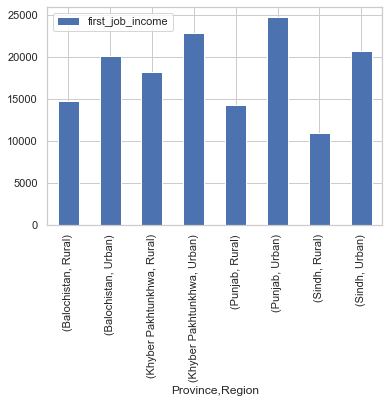

In [18]:
#here we fetch income data from the HIES.

df=pd.read_spss("data/data_hies/data_in_stata/sec 1b.sav")

inc_data=df[['hhcode','Province','Region','PSU','idc','s1bq08','s1bq15']]
inc_data=inc_data.rename(columns={"s1bq08":"first_job_income","s1bq15":"second_job_income"})
inc_data.to_csv("income_exp")
sns.set_theme(style="whitegrid")
inc_data=inc_data[~np.isnan(inc_data['first_job_income'])]
sum_inc=inc_data.groupby(['Province','Region']).agg({'first_job_income':'mean'})
inc_data.groupby(['Province','Region']).agg({'first_job_income':'mean'}).plot(kind="bar")
inc_data.to_csv("data/data_hies/inc_data.csv")

In [19]:
#We normalize rent by extracting vital housing characteristics
df=pd.read_spss("data/data_hies/data_in_stata/sec 5a.sav")
df=df[['hhcode','Province','Region','PSU','S5aq03','S5aq05','S5aq06','S5aq21','S5aq30_1b','S5aq30_2b',
       'S5aq30_3b','S5aq31_1b','S5aq31_2b','S5aq31_3b','S5aq04']]
df=df.rename(columns={'S5aq03':'house/compound','S5aq05':'floor_material','S5aq06':'roof_material','S5aq21':'toilet_type',
                      'S5aq30_1b':'n_internet','S5aq30_2b':'n_mobile_phones',
       'S5aq30_3b':'n_landlines','S5aq31_1b':'n_broadband','S5aq31_2b':'n_wireless','S5aq31_3b':'n_mobile_subscriptions',"S5aq04":'n_rooms'})
df.to_csv("data/data_hies/hh_chars.csv")

In [20]:
df=pd.read_spss("data/data_hies/data_in_stata/sec 12B.sav")


In [21]:
df.head()

,hhcode,Province,Region,PSU,A01,A02,B01,B02,C01,C02,D01,D02,z
0,1.102100e+09,Khyber Pakhtunkhwa,Urban,11021001.0,3418.0,88868.0,6210.0,74520.0,1045.0,12540.0,82900.0,82900.0,258828.0
1,1.102100e+09,Khyber Pakhtunkhwa,Urban,11021001.0,2095.0,54470.0,7980.0,95760.0,5410.0,64920.0,58580.0,58580.0,273730.0
2,1.102100e+09,Khyber Pakhtunkhwa,Urban,11021001.0,7460.0,193960.0,11880.0,142560.0,5400.0,64800.0,656900.0,656900.0,1058220.0
3,1.102100e+09,Khyber Pakhtunkhwa,Urban,11021001.0,3380.0,87880.0,5642.0,67704.0,600.0,7200.0,54535.0,54535.0,217319.0
4,1.102100e+09,Khyber Pakhtunkhwa,Urban,11021001.0,1920.0,49920.0,6625.0,79500.0,1270.0,15240.0,64170.0,64170.0,208830.0


In [22]:
exp_isb=pd.read_csv("data/processed/exp_isb.csv")
exp_isb.shape

(836, 12)

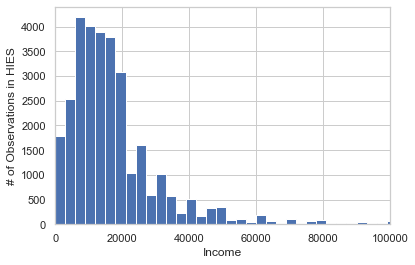

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fix,ax=plt.subplots()
ax.set_xlim(0,100000)

ax.hist(inc_data['first_job_income'],bins=500)
ax.set_xlabel("Income")
ax.set_ylabel("# of Observations in HIES")
plt.show()